Chapter 15

# 布丰投针
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用 Buffon 投针实验的蒙特卡罗模拟法来估计 $\pi$ 的值。具体过程如下：

1. **定义问题参数**：
   - 投针的长度 $l = 1$，平行线之间的距离 $t = 2$。
   - 投针的角度范围为 $\theta \in [0, \pi/2]$。

2. **计算投针落在平行线之间的概率密度**：
   - 投针投在间隔平行线之间的概率与投针的角度 $\theta$ 和投针的长度有关。针投中一条线的条件是其端点与某条线的垂直距离 $x$ 满足 $x < \frac{l}{2} \sin(\theta)$。
   - 该距离 $x$ 的计算公式是 $x = \frac{t}{2} \sin(\theta)$。

3. **生成随机样本**：
   - 使用蒙特卡罗模拟生成 2000 个随机的投针角度 $\theta$ 和距离 $x$，其中 $\theta$ 在 $[0, \pi/2]$ 范围内均匀分布，$x$ 在 $[0, t/2]$ 范围内均匀分布。

4. **统计满足条件的样本数量**：
   - 使用条件 $x < \frac{t}{2} \sin(\theta)$ 判断哪些样本满足条件。满足条件的点标记为蓝色，不满足的标记为红色，以便在散点图中展示。

5. **估计 $\pi$ 的值**：
   - 根据 Buffon 投针问题的解，$\pi$ 的估计值可以通过以下公式获得：
   $$
   \hat{\pi} = \frac{2l \cdot N}{t \cdot N_{\text{hit}}}
   $$
   其中，$N$ 是投针的总数，$N_{\text{hit}}$ 是满足条件的样本数。

6. **可视化**：
   - 绘制投针角度 $\theta$ 与相应距离 $x$ 的散点图，并通过黑线绘制理论概率密度函数曲线 $\frac{t}{2} \sin(\theta)$。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib

In [2]:
# 设置针的长度和线间距离
l = 1  # 针的长度
t = 2  # 平行线之间的距离

In [3]:
# 设置样本数量和角度范围
num = 2000  # 投针数量
theta_1 = 0  # 角度范围下限
theta_2 = np.pi / 2  # 角度范围上限

In [4]:
# 定义函数 f(theta) = sin(theta) / 2
def f(theta):  
    # 计算针的垂直位置，角度为theta
    return np.sin(theta) / 2  # 返回sin(theta)/2

In [5]:
# 计算理论曲线的数据
theta_array = np.arange(theta_1, theta_2, np.pi / 100)  # 生成从theta_1到theta_2的角度数组
x_array = f(theta_array)  # 计算对应角度下的垂直位置
x_max = t / 2  # 设置垂直位置的最大值为t/2

In [6]:
# 随机生成角度和位置
theta_rand = theta_1 + (theta_2 - theta_1) * np.random.random(num)  # 生成随机角度
x_rand = np.random.random(num) * x_max  # 生成随机的垂直位置

In [7]:
# 分类：判断是否落在线上
ind_below = np.where(x_rand < f(theta_rand))  # 找到垂直位置小于理论值的索引
ind_above = np.where(x_rand >= f(theta_rand))  # 找到垂直位置大于或等于理论值的索引

Text(42.597222222222214, 0.5, '$x$')

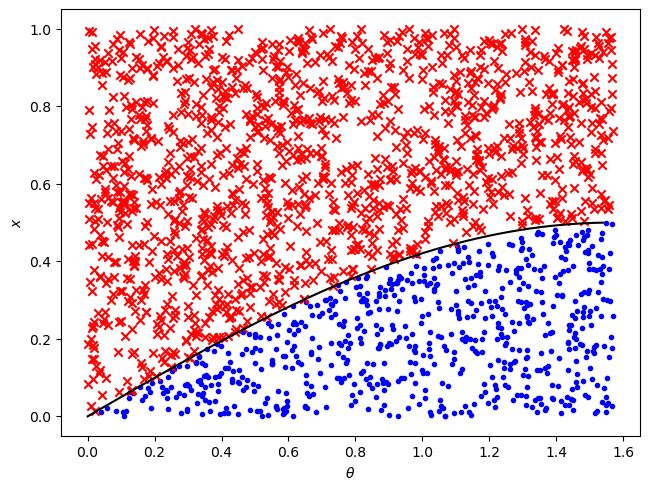

In [8]:
# 绘制图形
fig, ax = plt.subplots()  # 创建绘图窗口

# 绘制在曲线下方的点
plt.scatter(theta_rand[ind_below], x_rand[ind_below], color="b", marker='.')  # 绘制蓝色点表示在曲线下方的点

# 绘制在曲线上方的点
plt.scatter(theta_rand[ind_above], x_rand[ind_above], color="r", marker='x')  # 绘制红色叉表示在曲线上方的点

# 绘制理论曲线
plt.plot(theta_array, x_array, color="k")  # 绘制曲线表示理论值
plt.tight_layout()  # 调整布局
plt.xlabel(r'$\theta$')  # 设置x轴标签
plt.ylabel('$x$')  # 设置y轴标签

In [9]:
# 估算π值
estimated_pi = num / np.sum(x_rand < f(theta_rand)) * 2 * l / t  # 使用公式估算π值
print(estimated_pi)  # 输出估算的π值

2.949852507374631
